# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [255]:
import pandas as pd
import os 

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [256]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [257]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]
df_elec = df[elec_cols]
df_elec.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73


In [258]:
weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]
df_weat = df[weat_cols]
df_weat.head()

,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,4821,884,2.2,62.7,1.8,0.0,-1.0
2,4821,884,2.3,63.1,2.1,0.0,-0.6
3,4821,884,2.2,62.4,2.5,0.0,-1.3
4,4821,884,1.7,63.5,1.7,0.0,-0.2
5,4821,884,1.7,63.0,1.6,0.0,-0.8


In [259]:
reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]

df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


### Train과 val을 먼저 나누지 말고 년도별로 나눠보자 

In [260]:
df_2020 = df_new[df_new['electric_train.tm'].dt.year == 2020]
df_2021 = df_new[df_new['electric_train.tm'].dt.year == 2021]
df_2022 = df_new[df_new['electric_train.tm'].dt.year == 2022]
df_2023 = df_new[df_new['electric_train.tm'].dt.year == 2023]

df_2020.reset_index(drop=True, inplace=True)
df_2021.reset_index(drop=True, inplace=True)
df_2022.reset_index(drop=True, inplace=True)
df_2023.reset_index(drop=True, inplace=True)




In [261]:
df_2020.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3
1,2020-01-01 02:00:00,2,2,0,42250,58,4101.00,79.776051,88.63,5565,184,2.5,69.7,1.8,0.0,-0.2
2,2020-01-01 03:00:00,3,2,0,42250,58,3724.60,79.776051,80.50,5565,184,2.8,69.5,2.3,0.0,-0.2
3,2020-01-01 04:00:00,4,2,0,42250,58,3484.40,79.776051,75.31,5565,184,2.8,66.0,1.6,0.0,0.5
4,2020-01-01 05:00:00,5,2,0,42250,58,3409.12,79.776051,73.68,5565,184,3.0,66.1,1.6,0.0,0.5


In [262]:
a = df_2020['electric_train.n'].unique()

print(a)
print(len(a))

[ 58  19  11  14  10  29  23  30  49  25  13  52  38  62  21  16  46  53
 126  32  12  50  68  72  90  41  27  73 133  61  15  77  45  44 194  57
  60  24  96  17  18  36  26  75  33  71  37 105  22  81  34  39  42  20
  48  97  78  51  56  35  80  55  86 137  28  76 138  31  83  63  43 129
  88  74 121  67 114 229 117 220 166 175 208  47  40  64 118 285 195 142
 214 163  98 181 112 263  89 173 155 132]
100


In [263]:
df_2020_0am = df_2020[df_2020['electric_train.tm'].dt.hour == 1]

df_2020_0am

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3
24,2020-01-02 01:00:00,1,3,0,42250,58,4358.52,79.776051,94.20,5565,184,6.3,67.5,1.0,0.0,5.4
48,2020-01-03 01:00:00,1,4,0,42250,58,4524.72,79.776051,97.79,5565,184,7.6,72.0,0.8,0.0,6.5
72,2020-01-04 01:00:00,1,5,1,42250,58,4518.44,79.776051,97.65,5565,184,5.4,76.4,1.7,0.0,3.9
96,2020-01-05 01:00:00,1,6,1,42250,58,4490.52,79.776051,97.05,5565,184,6.0,74.1,1.5,0.0,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634780,2020-12-27 01:00:00,1,6,1,31450,25,4818.40,183.102334,105.26,20947,671,0.5,47.7,0.7,0.0,-1.4
2634804,2020-12-28 01:00:00,1,0,0,31450,25,4546.88,183.102334,99.33,20947,671,5.2,52.8,0.7,0.0,4.0
2634828,2020-12-29 01:00:00,1,1,0,31450,25,4587.52,183.102334,100.22,20947,671,4.1,74.2,0.9,0.0,2.5
2634852,2020-12-30 01:00:00,1,2,0,31450,25,4707.20,183.102334,102.83,20947,671,0.8,41.7,1.4,0.0,-1.9


In [264]:
# 매일 00시
df_2020_0am_day = df_2020_0am[(df_2020_0am['electric_train.tm'].dt.month == 1) & (df_2020_0am['electric_train.tm'].dt.day == 1)]

df_2020_0am_day.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3
8783,2020-01-01 01:00:00,1,2,0,16750,19,1802.20,97.138634,97.65,5566,184,2.3,65.8,1.7,0.0,-0.3
17566,2020-01-01 01:00:00,1,2,0,14600,11,2588.72,241.745562,97.35,5567,330,0.7,74.8,3.1,0.0,-2.6
26349,2020-01-01 01:00:00,1,2,0,16100,14,2691.52,186.873616,102.88,9735,165,2.1,66.8,1.7,0.0,-6.0
35132,2020-01-01 01:00:00,1,2,0,7750,10,1610.96,156.399551,103.00,9736,774,-4.4,70.8,1.4,0.0,-7.1


In [265]:
# 2020-01-02 00시에 측정된 구간이 300개
local_split_idx = df_2020_0am_day.index.to_list()
print(local_split_idx[:10])
print(local_split_idx[-10:])
print(len(local_split_idx))

[0, 8783, 17566, 26349, 35132, 43915, 52698, 61481, 70264, 79047]
[2547069, 2555852, 2564635, 2573418, 2582201, 2590984, 2599767, 2608550, 2617333, 2626116]
300


In [266]:
print(local_split_idx[1]- local_split_idx[0])
print(local_split_idx[2]- local_split_idx[1])
print(local_split_idx[3]- local_split_idx[2])

8783
8783
8783


In [267]:
df_2020.loc[:local_split_idx[1]-1]

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3
1,2020-01-01 02:00:00,2,2,0,42250,58,4101.00,79.776051,88.63,5565,184,2.5,69.7,1.8,0.0,-0.2
2,2020-01-01 03:00:00,3,2,0,42250,58,3724.60,79.776051,80.50,5565,184,2.8,69.5,2.3,0.0,-0.2
3,2020-01-01 04:00:00,4,2,0,42250,58,3484.40,79.776051,75.31,5565,184,2.8,66.0,1.6,0.0,0.5
4,2020-01-01 05:00:00,5,2,0,42250,58,3409.12,79.776051,73.68,5565,184,3.0,66.1,1.6,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2020-12-31 19:00:00,19,3,0,42250,58,6193.00,79.776051,133.84,5565,184,4.0,55.2,6.7,0.0,-0.8
8779,2020-12-31 20:00:00,20,3,0,42250,58,6133.00,79.776051,132.55,5565,184,4.1,57.3,6.2,0.0,-0.5
8780,2020-12-31 21:00:00,21,3,0,42250,58,6006.80,79.776051,129.82,5565,184,4.2,56.4,6.9,0.0,-0.7
8781,2020-12-31 22:00:00,22,3,0,42250,58,5806.84,79.776051,125.50,5565,184,4.2,56.9,6.0,0.0,-0.4


In [268]:
df_2020.loc[local_split_idx[1]:local_split_idx[2]-1]

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
8783,2020-01-01 01:00:00,1,2,0,16750,19,1802.20,97.138634,97.65,5566,184,2.3,65.8,1.7,0.0,-0.3
8784,2020-01-01 02:00:00,2,2,0,16750,19,1627.12,97.138634,88.16,5566,184,2.5,69.7,1.8,0.0,-0.2
8785,2020-01-01 03:00:00,3,2,0,16750,19,1491.96,97.138634,80.84,5566,184,2.8,69.5,2.3,0.0,-0.2
8786,2020-01-01 04:00:00,4,2,0,16750,19,1383.68,97.138634,74.97,5566,184,2.8,66.0,1.6,0.0,0.5
8787,2020-01-01 05:00:00,5,2,0,16750,19,1376.28,97.138634,74.57,5566,184,3.0,66.1,1.6,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17561,2020-12-31 19:00:00,19,3,0,16750,19,2722.28,97.138634,147.50,5566,184,4.0,55.2,6.7,0.0,-0.8
17562,2020-12-31 20:00:00,20,3,0,16750,19,2727.80,97.138634,147.80,5566,184,4.1,57.3,6.2,0.0,-0.5
17563,2020-12-31 21:00:00,21,3,0,16750,19,2584.72,97.138634,140.05,5566,184,4.2,56.4,6.9,0.0,-0.7
17564,2020-12-31 22:00:00,22,3,0,16750,19,2671.16,97.138634,144.73,5566,184,4.2,56.9,6.0,0.0,-0.4


In [269]:
# 구역 이름을 정해주자 
df_2020['zone'] = 0

In [270]:
for i in range(len(local_split_idx)-1):
    df_2020.loc[local_split_idx[i]:local_split_idx[i+1]-1, 'zone'] = i

df_2020.loc[local_split_idx[-1]:, 'zone'] = len(local_split_idx)-1

In [271]:
df_2020['zone'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [272]:
df_2020[df_2020['zone']==0]

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,zone
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3,0
1,2020-01-01 02:00:00,2,2,0,42250,58,4101.00,79.776051,88.63,5565,184,2.5,69.7,1.8,0.0,-0.2,0
2,2020-01-01 03:00:00,3,2,0,42250,58,3724.60,79.776051,80.50,5565,184,2.8,69.5,2.3,0.0,-0.2,0
3,2020-01-01 04:00:00,4,2,0,42250,58,3484.40,79.776051,75.31,5565,184,2.8,66.0,1.6,0.0,0.5,0
4,2020-01-01 05:00:00,5,2,0,42250,58,3409.12,79.776051,73.68,5565,184,3.0,66.1,1.6,0.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,2020-12-31 19:00:00,19,3,0,42250,58,6193.00,79.776051,133.84,5565,184,4.0,55.2,6.7,0.0,-0.8,0
8779,2020-12-31 20:00:00,20,3,0,42250,58,6133.00,79.776051,132.55,5565,184,4.1,57.3,6.2,0.0,-0.5,0
8780,2020-12-31 21:00:00,21,3,0,42250,58,6006.80,79.776051,129.82,5565,184,4.2,56.4,6.9,0.0,-0.7,0
8781,2020-12-31 22:00:00,22,3,0,42250,58,5806.84,79.776051,125.50,5565,184,4.2,56.9,6.0,0.0,-0.4,0


In [273]:
df_2020[df_2020['zone']==1]

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,zone
8783,2020-01-01 01:00:00,1,2,0,16750,19,1802.20,97.138634,97.65,5566,184,2.3,65.8,1.7,0.0,-0.3,1
8784,2020-01-01 02:00:00,2,2,0,16750,19,1627.12,97.138634,88.16,5566,184,2.5,69.7,1.8,0.0,-0.2,1
8785,2020-01-01 03:00:00,3,2,0,16750,19,1491.96,97.138634,80.84,5566,184,2.8,69.5,2.3,0.0,-0.2,1
8786,2020-01-01 04:00:00,4,2,0,16750,19,1383.68,97.138634,74.97,5566,184,2.8,66.0,1.6,0.0,0.5,1
8787,2020-01-01 05:00:00,5,2,0,16750,19,1376.28,97.138634,74.57,5566,184,3.0,66.1,1.6,0.0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17561,2020-12-31 19:00:00,19,3,0,16750,19,2722.28,97.138634,147.50,5566,184,4.0,55.2,6.7,0.0,-0.8,1
17562,2020-12-31 20:00:00,20,3,0,16750,19,2727.80,97.138634,147.80,5566,184,4.1,57.3,6.2,0.0,-0.5,1
17563,2020-12-31 21:00:00,21,3,0,16750,19,2584.72,97.138634,140.05,5566,184,4.2,56.4,6.9,0.0,-0.7,1
17564,2020-12-31 22:00:00,22,3,0,16750,19,2671.16,97.138634,144.73,5566,184,4.2,56.9,6.0,0.0,-0.4,1


In [274]:
print(len(df_2020[df_2020['zone']==1]))
print(len(df_2020[df_2020['zone']==2]))
print(len(df_2020[df_2020['zone']==3]))
print(len(df_2020[df_2020['zone']==4]))

8783
8783
8783
8783


In [275]:
df_2020[df_2020['zone']==1].head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,zone
8783,2020-01-01 01:00:00,1,2,0,16750,19,1802.20,97.138634,97.65,5566,184,2.3,65.8,1.7,0.0,-0.3,1
8784,2020-01-01 02:00:00,2,2,0,16750,19,1627.12,97.138634,88.16,5566,184,2.5,69.7,1.8,0.0,-0.2,1
8785,2020-01-01 03:00:00,3,2,0,16750,19,1491.96,97.138634,80.84,5566,184,2.8,69.5,2.3,0.0,-0.2,1
8786,2020-01-01 04:00:00,4,2,0,16750,19,1383.68,97.138634,74.97,5566,184,2.8,66.0,1.6,0.0,0.5,1
8787,2020-01-01 05:00:00,5,2,0,16750,19,1376.28,97.138634,74.57,5566,184,3.0,66.1,1.6,0.0,0.5,1


In [278]:
df_2020[df_2020['zone']==1]['electric_train.n'].value_counts()

electric_train.n
19    8783
Name: count, dtype: int64

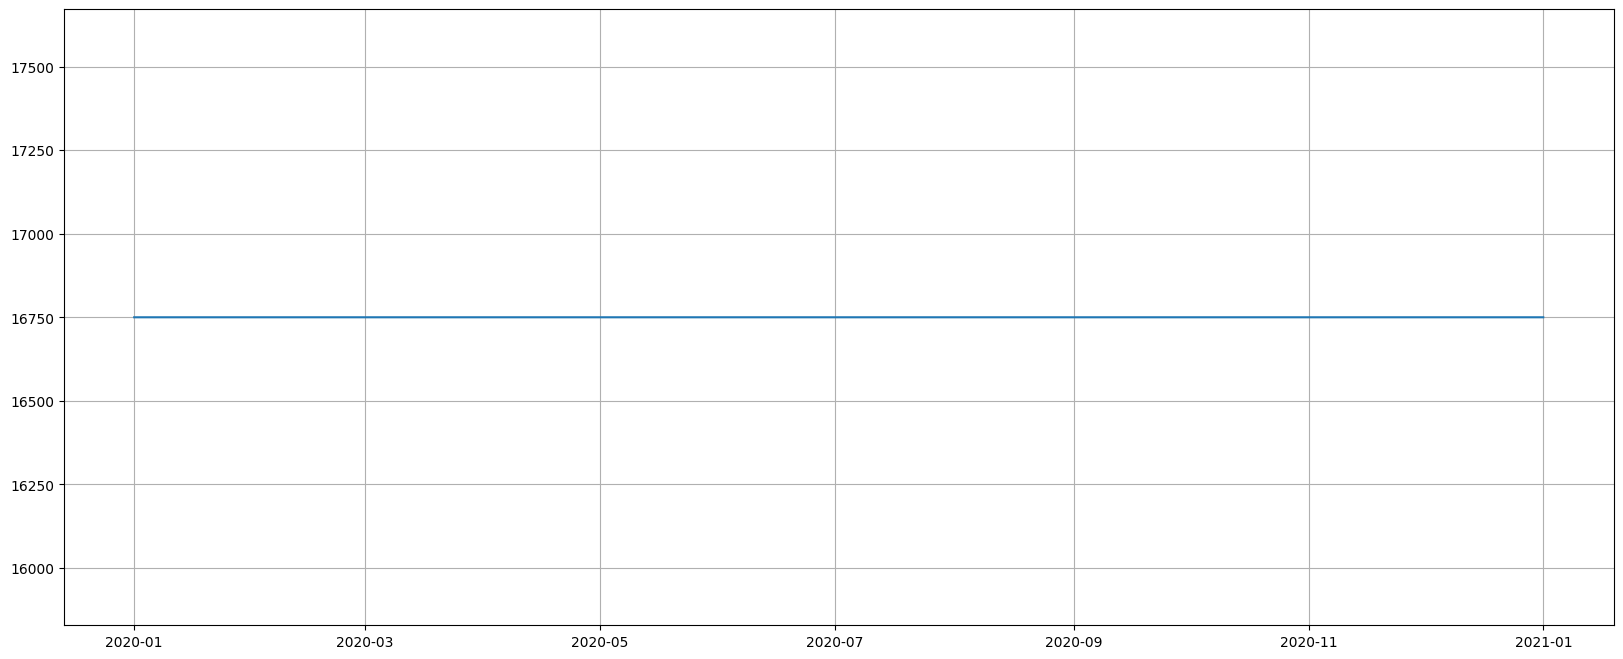

In [276]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.sum_qctr', data = df_2020[df_2020['zone']==1])
plt.grid()
plt.show()

In [279]:
df_2020[df_2020['zone']==1]['electric_train.stn'].value_counts()

electric_train.stn
184    8783
Name: count, dtype: int64

In [280]:
# AWS 지점 번호 -> 즉, 측정위치?
spots = df_2020['electric_train.stn'].unique().tolist()
spots[:10]

[184, 330, 165, 774, 168, 162, 294, 313, 712, 713]

In [281]:
df_2020[df_2020['electric_train.stn']==spots[0]]['zone'].value_counts()

zone
0    8783
1    8783
Name: count, dtype: int64

In [282]:
df_2020[df_2020['electric_train.stn']==spots[1]]['zone'].value_counts()

zone
2    8783
Name: count, dtype: int64

In [290]:
df_2020[df_2020['electric_train.stn']==spots[3]]['zone'].unique()

array([4, 8], dtype=int64)

In [285]:
import seaborn as sns
import numpy as np

<Axes: xlabel='electric_train.stn', ylabel='zone'>

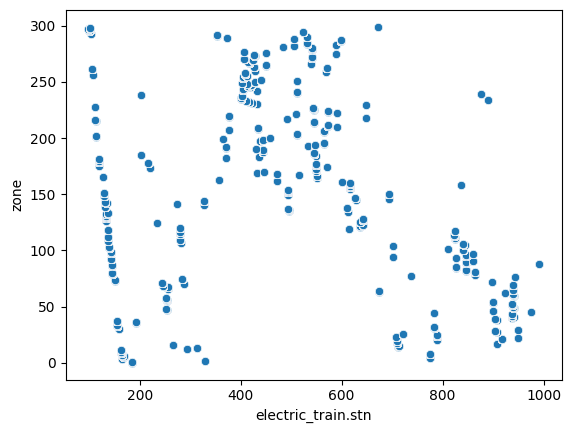

In [286]:
sns.scatterplot(x=df_2020['electric_train.stn'], y=df_2020['zone'])

In [288]:
len(df_2020['electric_train.stn'].unique())

176

In [289]:
len(df_2020['zone'].unique())

300

In [292]:
df_2020[df_2020['zone']==0].head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,zone
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3,0
1,2020-01-01 02:00:00,2,2,0,42250,58,4101.00,79.776051,88.63,5565,184,2.5,69.7,1.8,0.0,-0.2,0
2,2020-01-01 03:00:00,3,2,0,42250,58,3724.60,79.776051,80.50,5565,184,2.8,69.5,2.3,0.0,-0.2,0
3,2020-01-01 04:00:00,4,2,0,42250,58,3484.40,79.776051,75.31,5565,184,2.8,66.0,1.6,0.0,0.5,0
4,2020-01-01 05:00:00,5,2,0,42250,58,3409.12,79.776051,73.68,5565,184,3.0,66.1,1.6,0.0,0.5,0


In [294]:
zone_0_2020 = df_2020[df_2020['zone']==0]

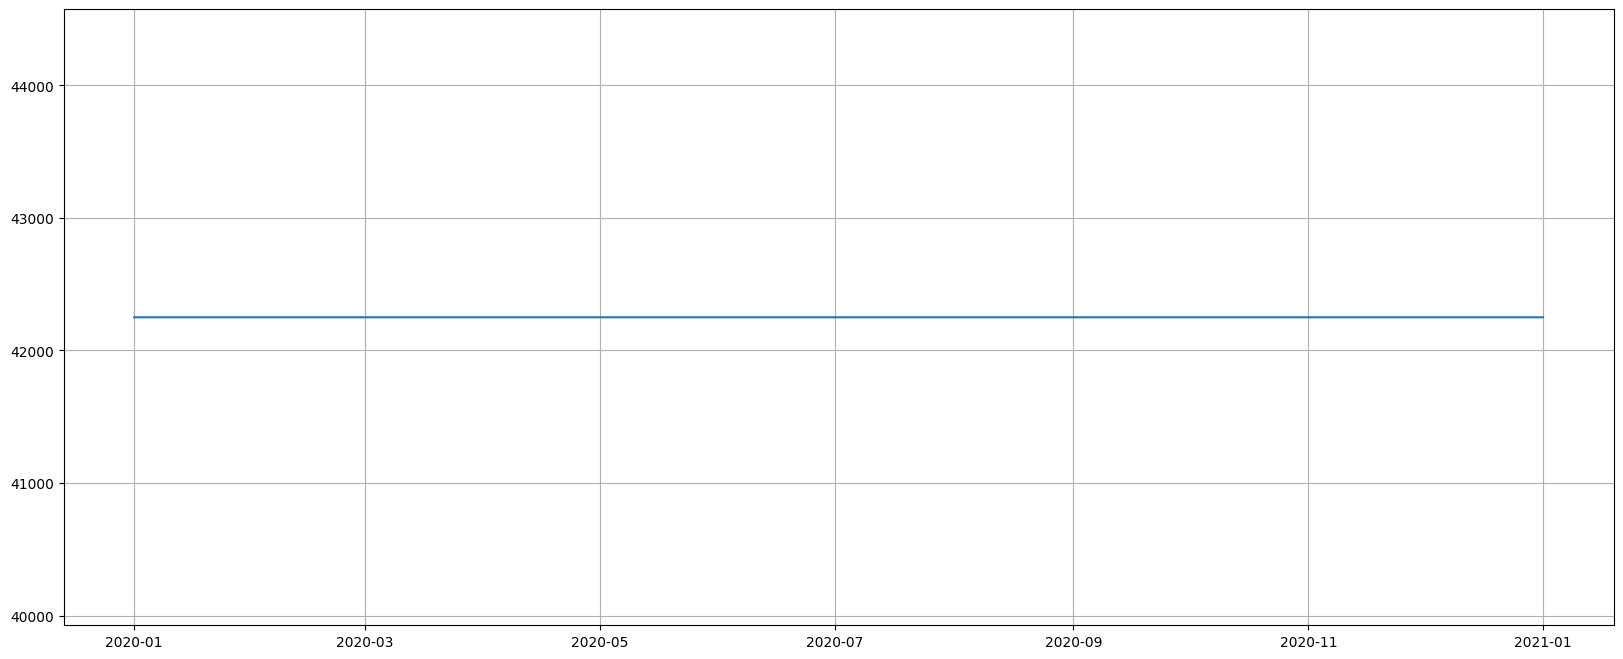

In [297]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.sum_qctr', data = zone_0_2020)
plt.grid()

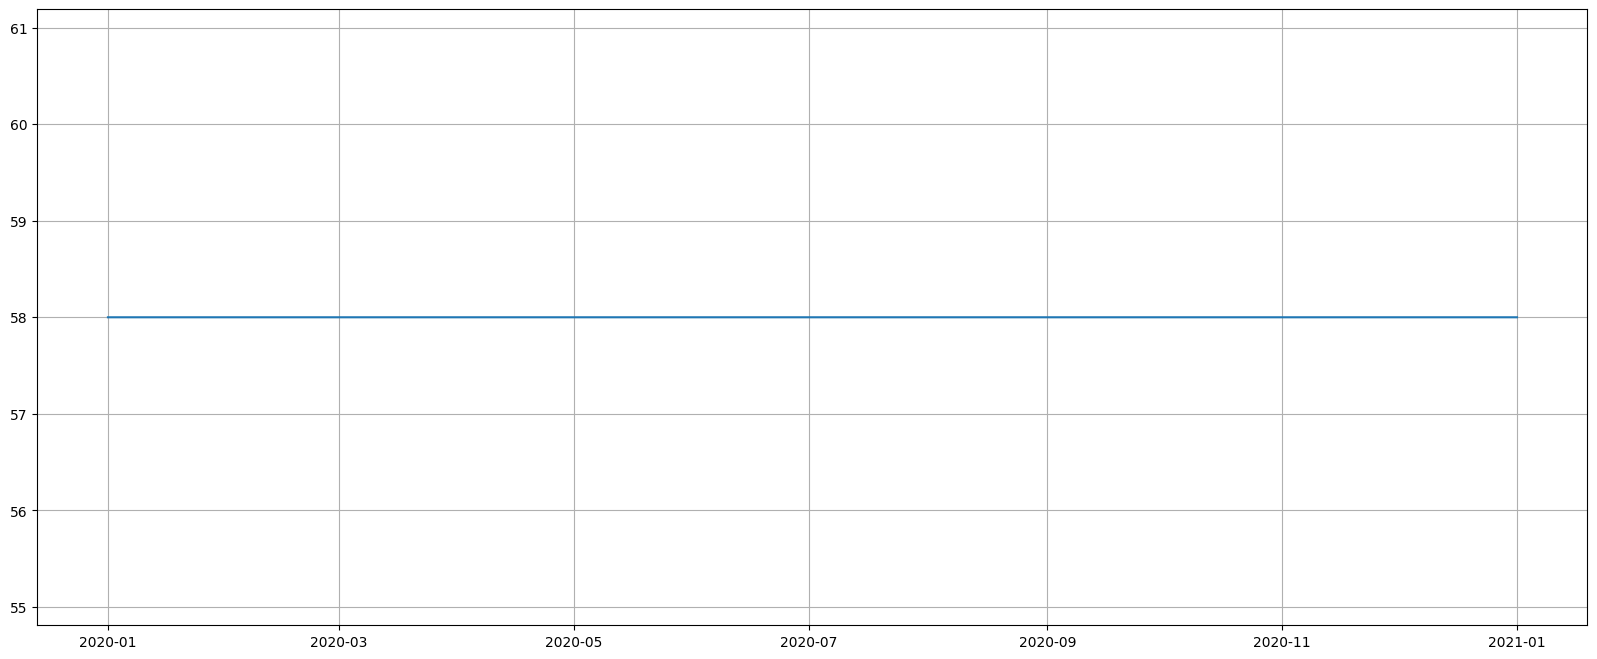

In [298]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.n', data = zone_0_2020)
plt.grid()

In [314]:
title_font = {
    'fontsize': 25
}

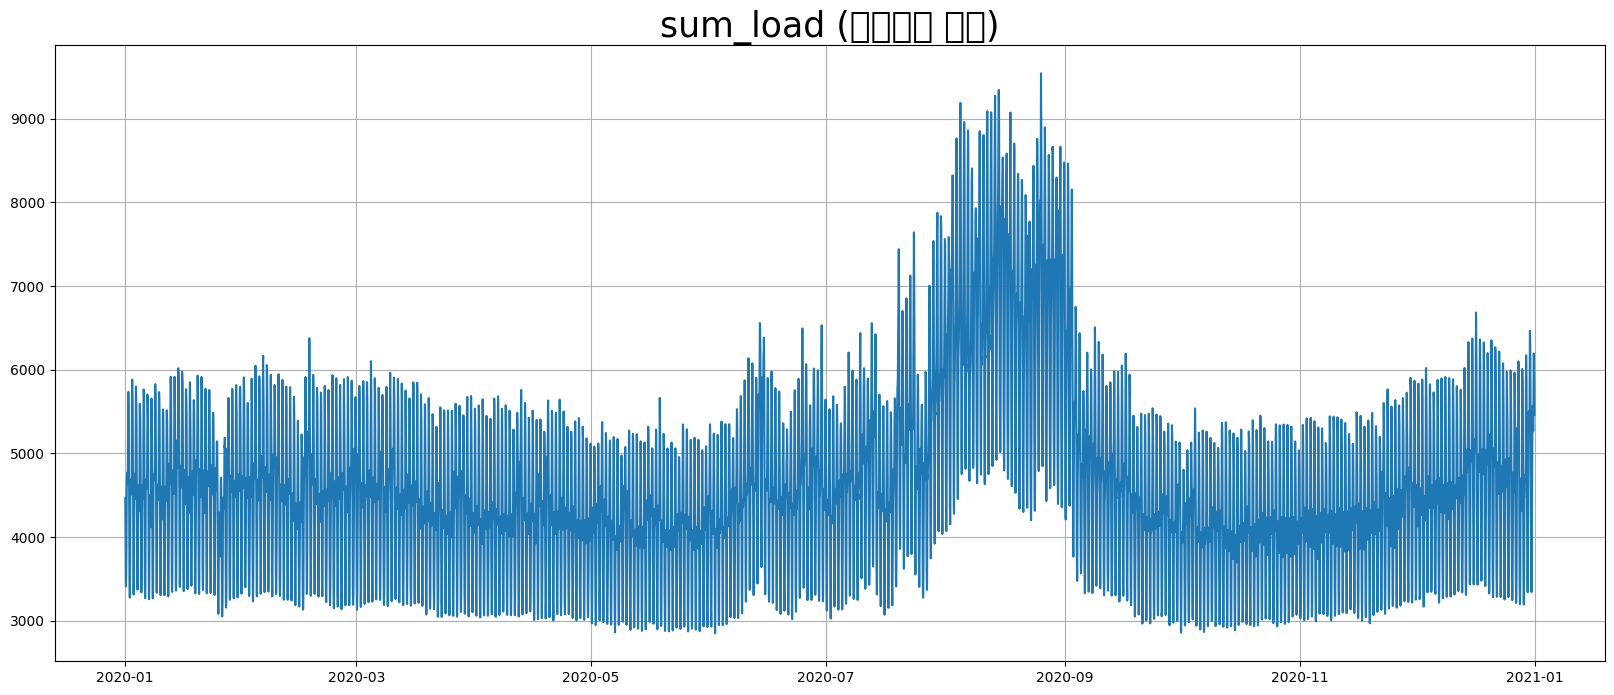

In [323]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.sum_load', data = zone_0_2020)
plt.title('sum_load (전력수요 합계)',fontdict=title_font)
plt.grid()

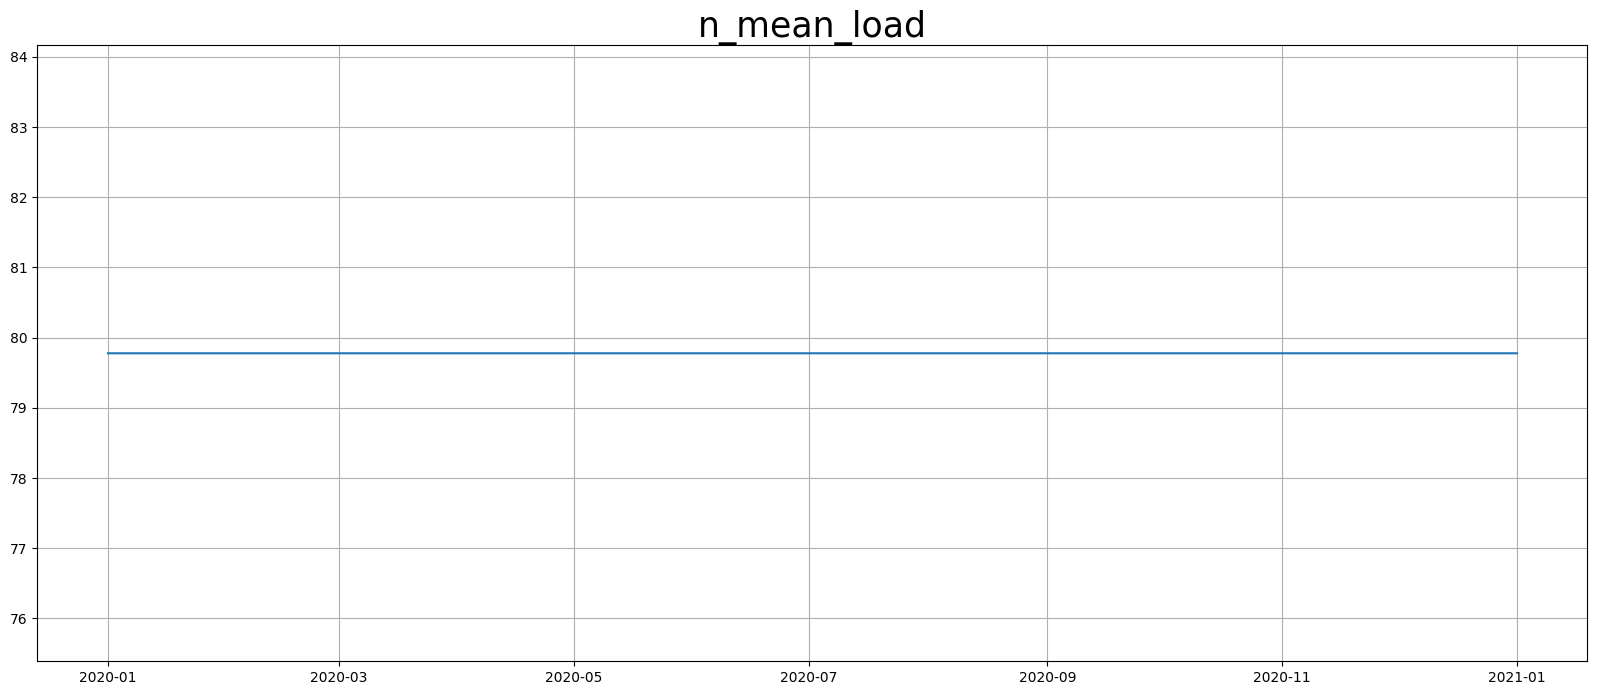

In [316]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.n_mean_load', data = zone_0_2020)
plt.title('n_mean_load',fontdict=title_font)
plt.grid()

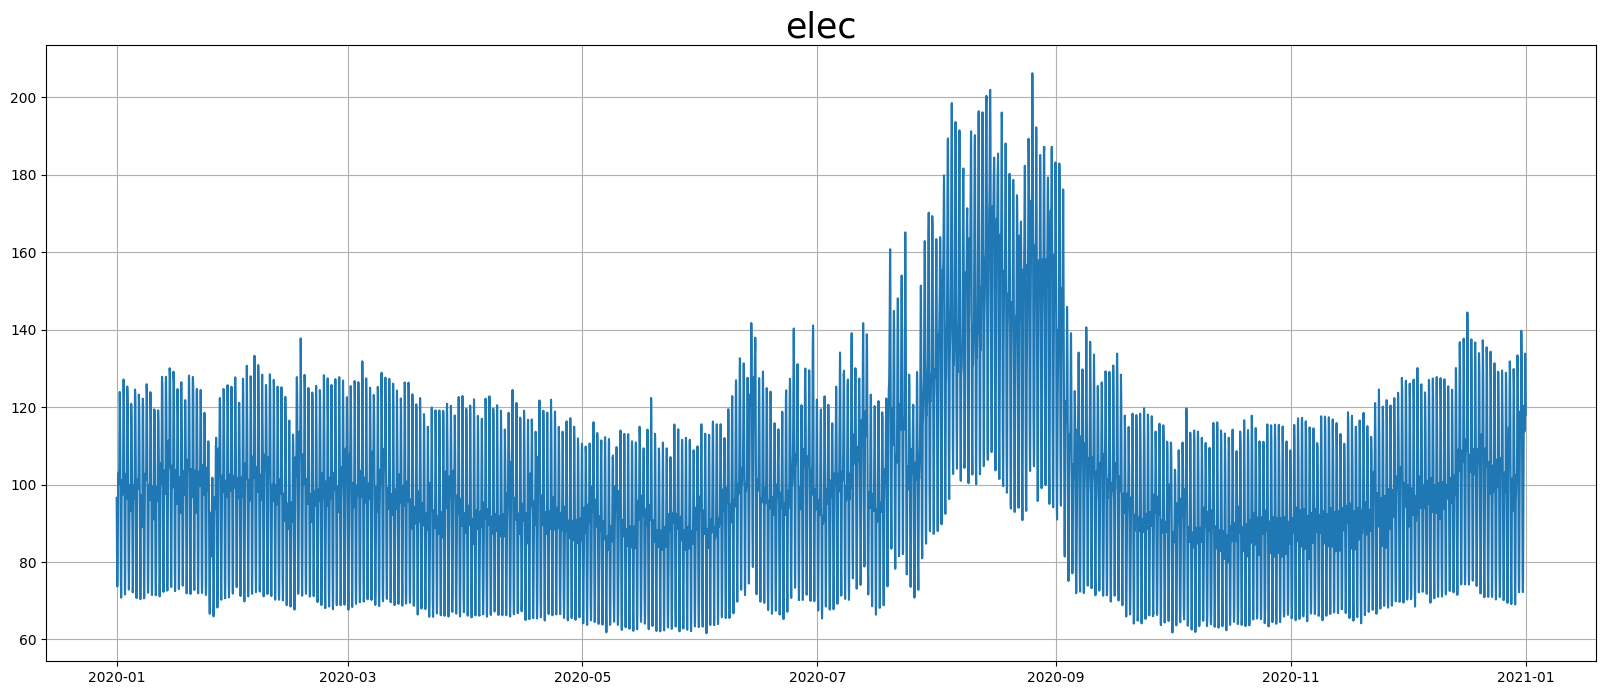

In [317]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.elec', data = zone_0_2020)
plt.title('elec',fontdict=title_font)
plt.grid()

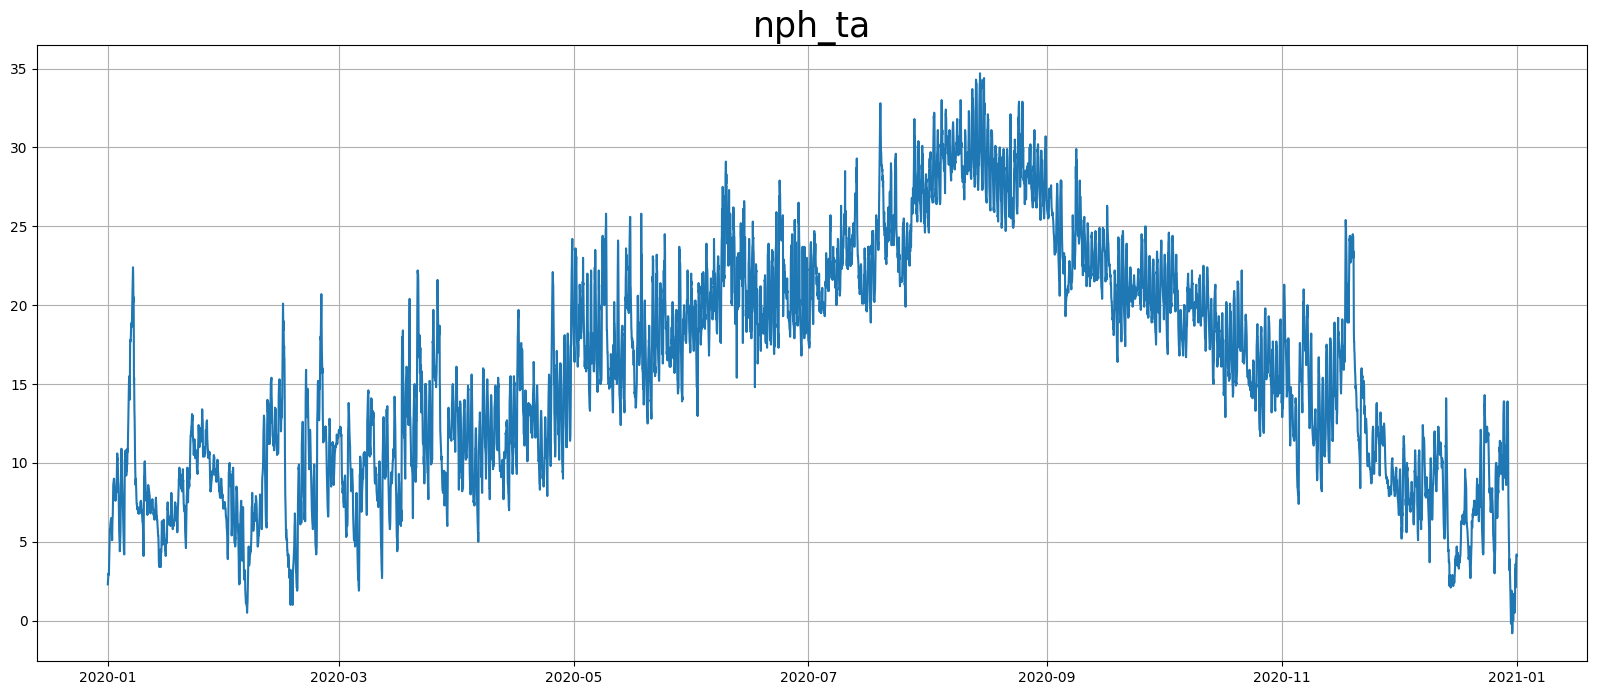

In [318]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_ta', data = zone_0_2020)
plt.title('nph_ta',fontdict=title_font)
plt.grid()

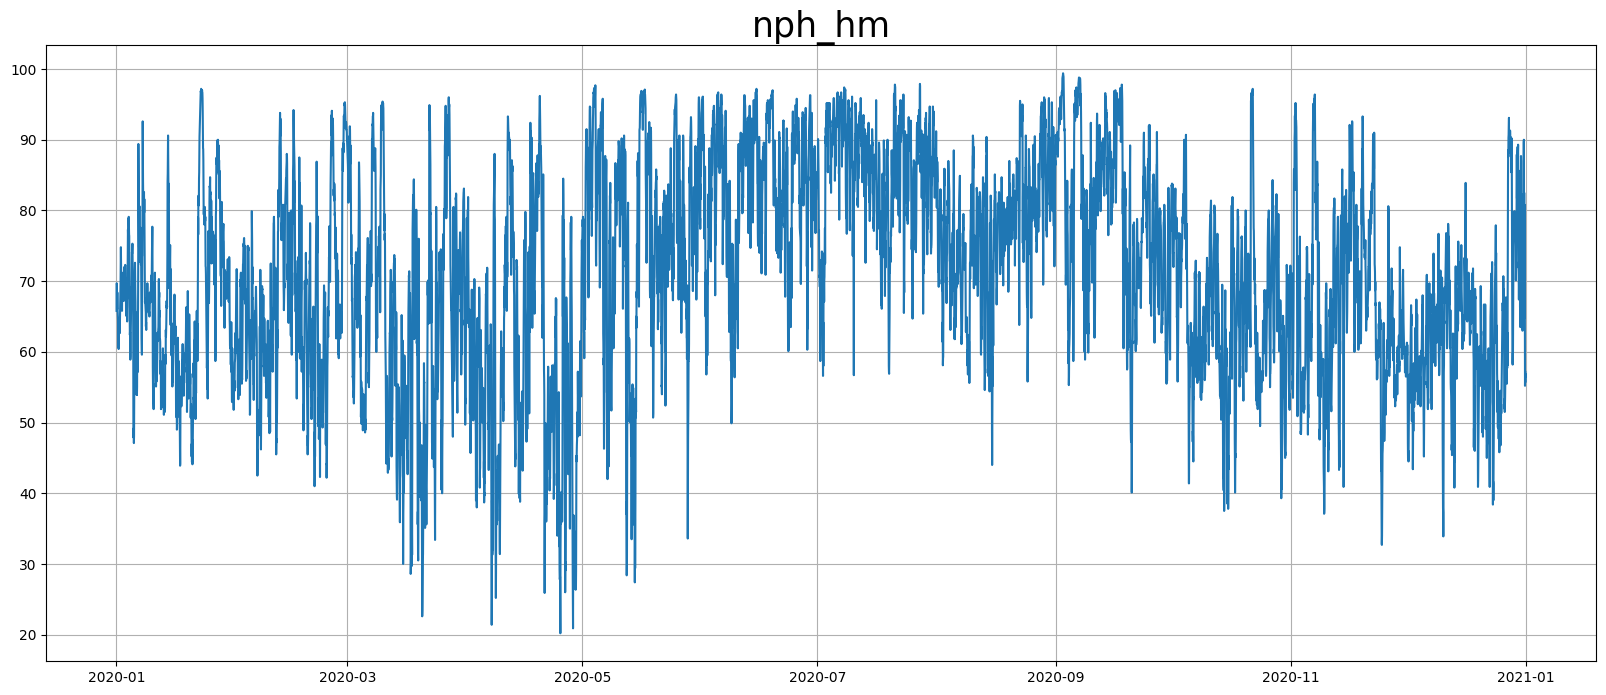

In [319]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_hm', data = zone_0_2020)
plt.title('nph_hm',fontdict=title_font)
plt.grid()

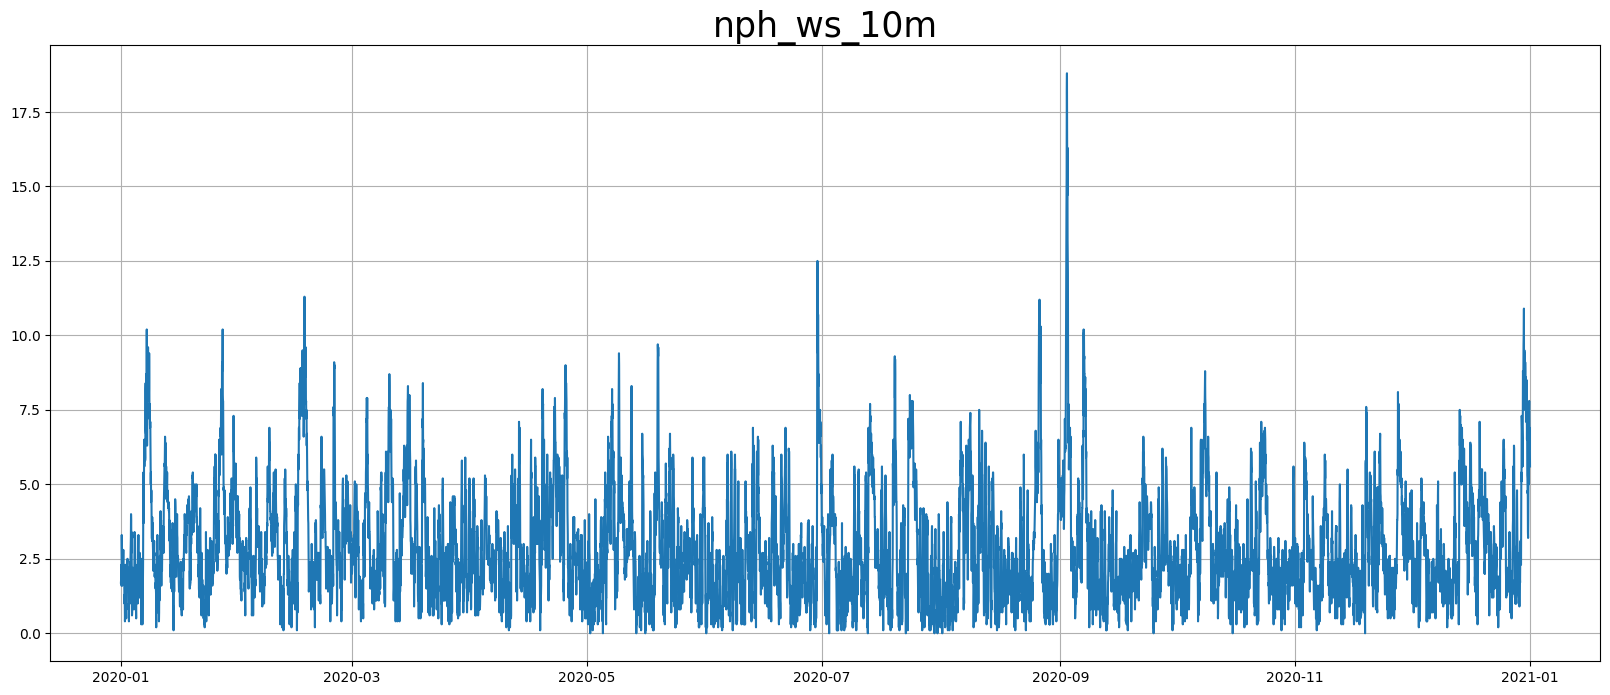

In [320]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_ws_10m', data = zone_0_2020)
plt.title('nph_ws_10m',fontdict=title_font)
plt.grid()

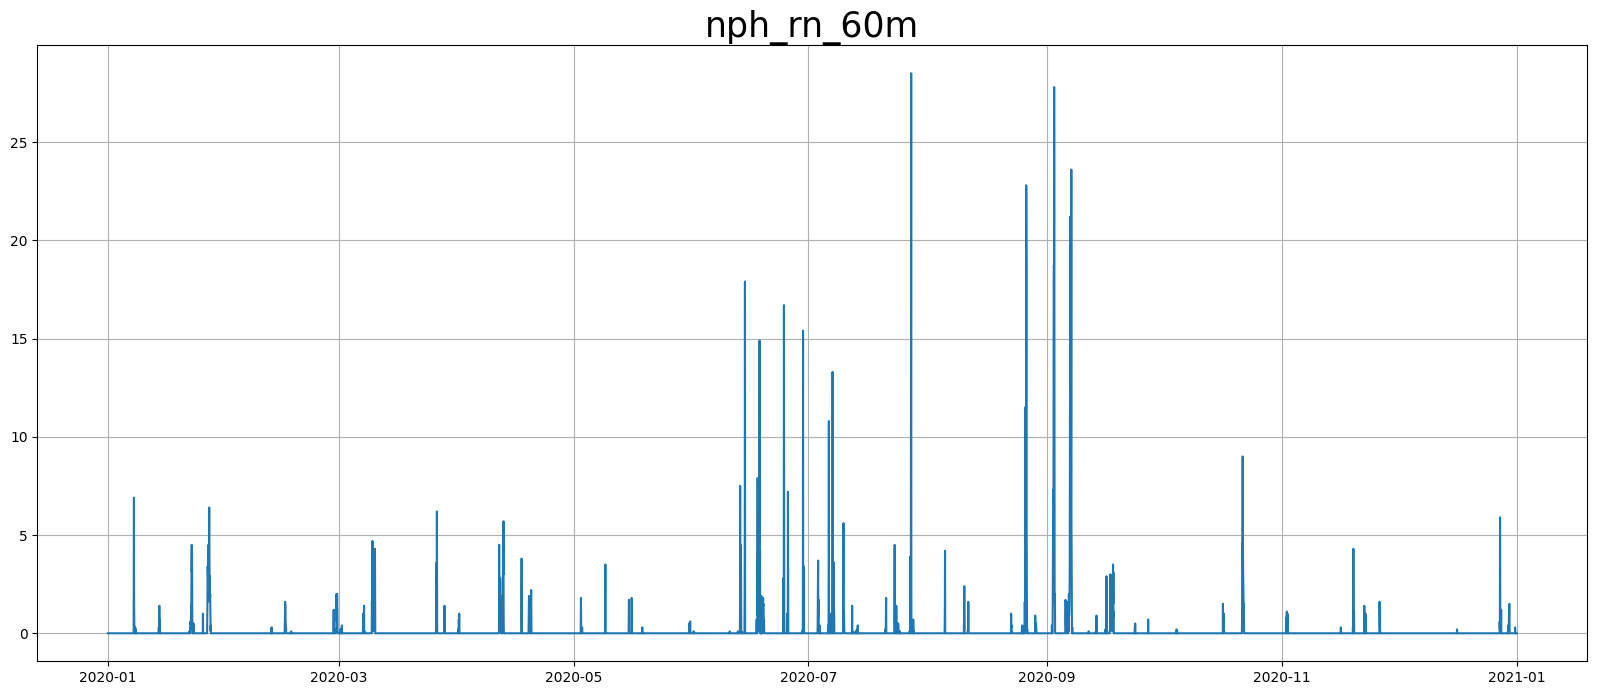

In [321]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_rn_60m', data = zone_0_2020)
plt.title('nph_rn_60m',fontdict=title_font)
plt.grid()

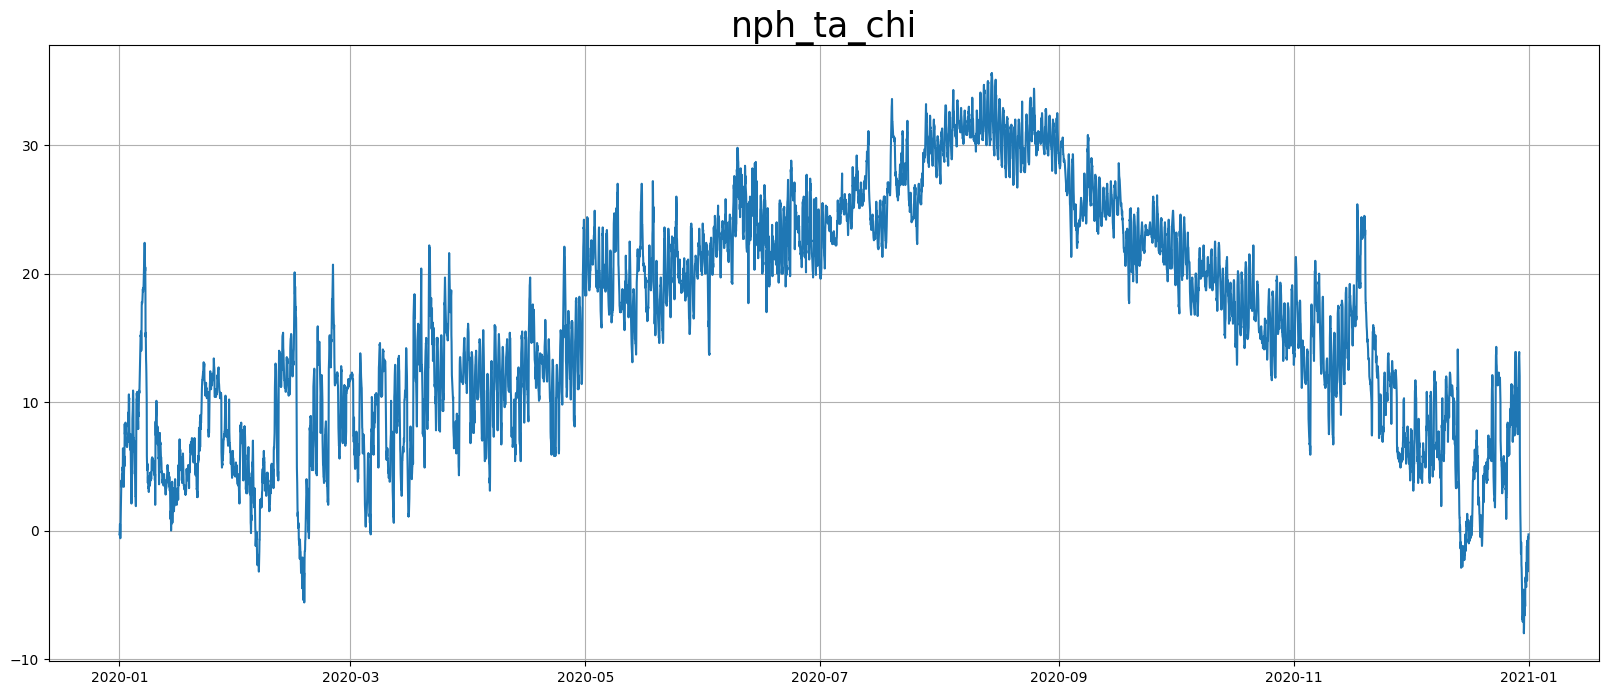

In [322]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.nph_ta_chi', data = zone_0_2020)
plt.title('nph_ta_chi',fontdict=title_font)
plt.grid()